In [6]:
import numpy as np
import pandas as pd
import os

In [7]:
titanic_train = pd.read_csv("G:/bilgisayar/AI/LAB/archive/AMZN.csv")      # Read the data


In [8]:
titanic_train.shape      # Check dimensions


(6516, 7)

In [9]:
titanic_train.head(5)  # Check the first 5 rows


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [10]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

Index(['Date'], dtype='object')


In [11]:
titanic_train[categorical].describe()


,Date
count,6516
unique,6516
top,1997-05-15
freq,1


In [13]:
titanic_train["Date"][0:15]       # Check the first 15 tickets


0     1997-05-15
1     1997-05-16
2     1997-05-19
3     1997-05-20
4     1997-05-21
5     1997-05-22
6     1997-05-23
7     1997-05-27
8     1997-05-28
9     1997-05-29
10    1997-05-30
11    1997-06-02
12    1997-06-03
13    1997-06-04
14    1997-06-05
Name: Date, dtype: object

In [15]:
titanic_train["Date"].describe()


count           6516
unique          6516
top       1997-05-15
freq               1
Name: Date, dtype: object

In [17]:
del titanic_train["Date"]        # Remove Ticket


In [19]:
new_Pclass = pd.Categorical(titanic_train["Volume"],
                           ordered=True)

In [20]:
new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     


ValueError: new categories need to have the same number of items as the old categories!

In [21]:
new_Pclass.describe()


,counts,freqs
categories,,
9744000,1,0.000153
11424000,1,0.000153
11496000,1,0.000153
11808000,1,0.000153
11832000,1,0.000153
...,...,...
1539704000,1,0.000153
1587488000,1,0.000153
1633512000,1,0.000153


In [22]:
titanic_train["Pclass"] = new_Pclass


In [24]:
titanic_train["Low"].unique()   # Check unique cabins


array([9.63540000e-02, 8.54170000e-02, 8.12500000e-02, ...,
       1.01949997e+02, 1.02110001e+02, 1.00750000e+02])

In [25]:
char_cabin = titanic_train["Low"].astype(str) # Convert data to str


In [26]:
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter


In [27]:
new_Cabin = pd.Categorical(new_Cabin)


In [28]:
new_Cabin .describe()


,counts,freqs
categories,,
0,840,0.128913
1,2354,0.361265
2,873,0.133978
3,744,0.114180
4,453,0.069521
5,130,0.019951
6,182,0.027931
7,140,0.021486
8,375,0.057551


In [29]:
titanic_train["Low"] = new_Cabin


In [30]:
dummy_vector = pd.Series([1,None,3,None,7,8])


In [33]:
dummy_vector.isnull()


0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [34]:
titanic_train["Close"].describe()


count    6516.000000
mean       31.599740
std        48.060258
min         0.069792
25%         2.001250
50%         6.444250
75%        38.464625
max       186.570496
Name: Close, dtype: float64

In [35]:
missing = np.where(titanic_train["Close"].isnull() == True)
missing

(array([], dtype=int64),)

In [36]:
len(missing[0])


0

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

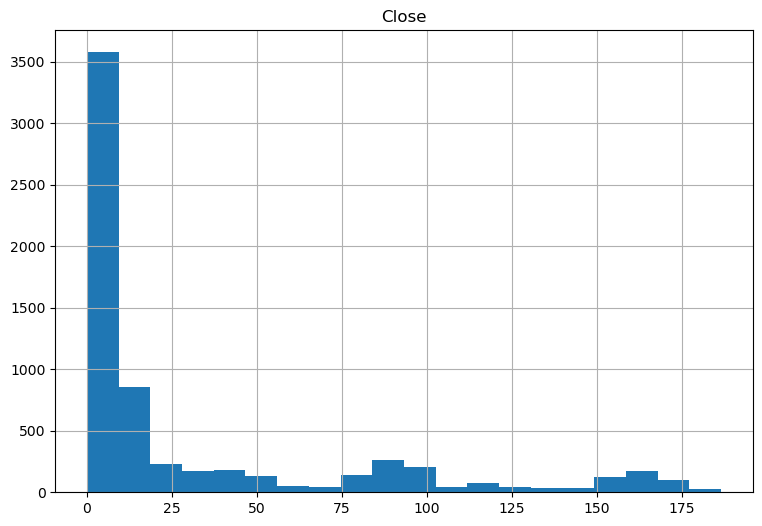

In [37]:
titanic_train.hist(column='Close',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins


In [40]:
new_age_var = np.where(titanic_train["Close"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Close"])     # Value if check is false

In [41]:
titanic_train["Close"] = new_age_var 


In [42]:
titanic_train["Close"].describe()


count    6516.000000
mean       31.599740
std        48.060258
min         0.069792
25%         2.001250
50%         6.444250
75%        38.464625
max       186.570496
Name: Close, dtype: float64

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

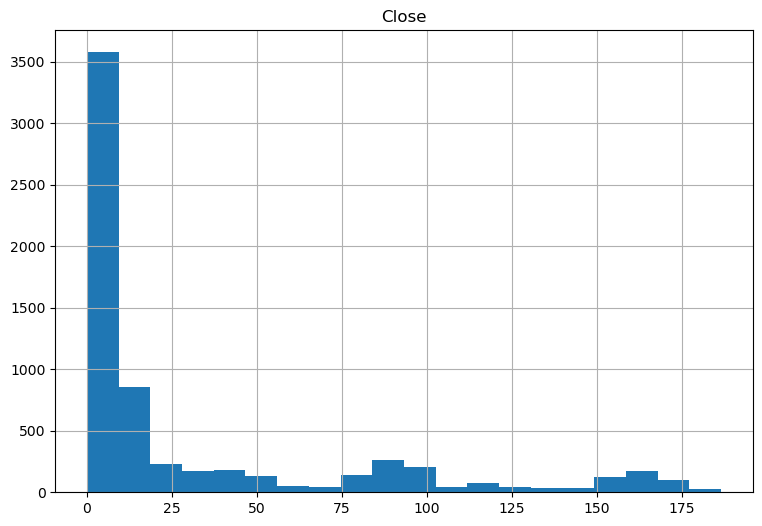

In [43]:
titanic_train.hist(column='Close',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins